In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore
import matplotlib.mlab as mlab
%matplotlib notebook

Given below is a dataset with information on Australian athletes. Inspect the data

In [2]:
columns_to_include = ["bmi","ht","wt","sex","sport"]
ais_data  = pd.read_csv("./data/ais.csv")[columns_to_include]
ais_data.head()

,bmi,ht,wt,sex,sport
0,20.56,195.9,78.9,f,B_Ball
1,20.67,189.7,74.4,f,B_Ball
2,21.86,177.8,69.1,f,B_Ball
3,21.88,185.0,74.9,f,B_Ball
4,18.96,184.6,64.6,f,B_Ball


Let us plot the distribution of height/ weight/ BMI of athletes. Then fit a bell-curve.

<IPython.core.display.Javascript object>


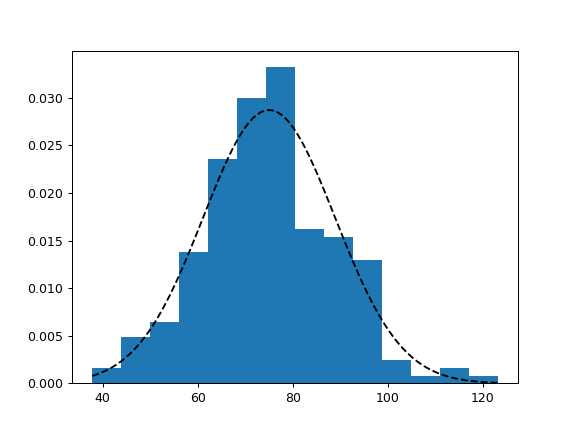

75.0079207920792
13.890688405898599


In [3]:
def fit_normal(data):
    
    data_mean = np.mean(data)
    data_variance = np.var(data)
    print(data_mean)
    print(np.sqrt(data_variance))

    x = np.linspace(np.min(data),np.max(data),100)
    y = 1.0/np.sqrt(2*np.pi*data_variance)*np.exp(-0.5*(x-data_mean)**2/data_variance)
    
    return x, y

doi = ais_data["wt"]

plt.hist(doi, bins = 14, density=True)
pdf_x, pdf_y = fit_normal(doi)

plt.plot(pdf_x, pdf_y,'--k')
plt.show()


It is uncanny that all these attributes (nearly!) follow a bell-curve distribution. It implies that Normal distribution could be a model to explain physical processes.

For the moment ignore the formula with the exponential term in fit_normal(), which was used to obtain the bell curve. One thing to notice is that formula itself depends only on the mean and variance of the dataset. Indeed, only 2 parameters, $(\mu, \sigma^2)$ are needed to describe the Normal distribution. Let us see their effect on the distribution

<IPython.core.display.Javascript object>


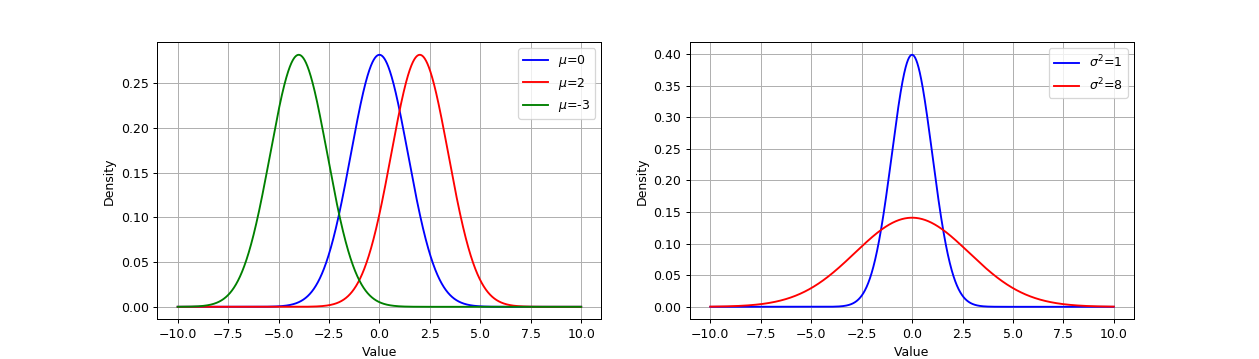

In [4]:

def normal_dist(data_mean, data_variance, nsamples = 10000):
    x = np.linspace(-10.0, 10.0, nsamples)
    y = 1.0/np.sqrt(2*np.pi*data_variance)*np.exp(-0.5*(x-data_mean)**2/data_variance)
    return x, y

fig, (axes) = plt.subplots(1,2)
fig.set_size_inches(14.0, 4.0)

x, y = normal_dist(0, 2)
axes[0].plot(x, y, c='blue',label='$\mu$=0')

x, y = normal_dist(2, 2)
axes[0].plot(x, y, c='red',label='$\mu$=2')

x, y = normal_dist(-4, 2)
axes[0].plot(x, y, c='green',label='$\mu$=-3')

x, y = normal_dist(0, 1)
axes[1].plot(x, y, c='blue',label='$\sigma^2$=1')

x, y = normal_dist(0, 8)
axes[1].plot(x, y, c='red',label='$\sigma^2$=8')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[0].legend()
axes[1].legend()
axes[0].grid()
axes[1].grid()

plt.show()

Parameter $\mu$ determines the location and $\sigma$ determines the width of the distribution.

How do we interpret density in the plot above? For $\sigma^2 = 2$ the probability that the data value lies in a tiny band around the mean, is 27 percent. 

In the Australian athletes dataset, there is a probability of 14 percent that a given athlete's bmi is around 22.5.

Normal distribution is symmetric. If $X$ is the variable we are interested in, then

\begin{equation*}
\text{Prob}(X \le \mu) = \text{Prob}(X \ge \mu) = 0.5 
\end{equation*}

We can also estimate the probability of the data lying within a larger band around the mean value. For eg
\begin{equation*}
\text{Prob}(\mu - \sigma \le X \le \mu + \sigma) = 0.68 \\
\text{Prob}(\mu - 2\sigma \le X \le \mu + 2\sigma) = 0.95 \\
\text{Prob}(\mu - 3\sigma \le X \le \mu + 3\sigma) = 0.99 \\
\end{equation*}

Let us visualize the above results in the standard normal distribution, i.e., $\mu=0$ and $\sigma=1$. 

<img src="./figures/gaussian_dist1.png">

### Sum of 2 independent normal variables
Say, X and Y are normally distributed with $(\mu_x,\sigma_x^2)$ and $(\mu_y,\sigma_y^2)$

Let $W = aX + bY$

Then W is also normally distributed with $(a\mu_x+b\mu_y,a^2\sigma_x^2+b^2\sigma_y^2)$

IQ Scores are normally distributed. Students at University A have IQ scores mean 130 and sd 6. At University B the mean is 120 and sd is 9. If you compare a random student from each university, what is the probability the IQ score from the University A student will be higher by 5 points or more?

Hint: Define X = A - B